In [1]:
import pandas as pd
import pyarrow.parquet as pq
import numpy as np

/Users/wusiyuan/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
demand=pq.read_table('data/demand.parquet').to_pandas()
metadata=pq.read_table('data/metadata.parquet').to_pandas()
weather=pq.read_table('data/weather.parquet').to_pandas()

In [3]:
filtered_df = demand[(demand['timestamp'] >= '2013-01-01') & (demand['timestamp'] <= '2013-12-30')]

In [4]:
metadata2=metadata[metadata["freq"]=="1H"]

In [5]:
metadata2=metadata2[metadata2["location"]=="London, UK"]

In [6]:
metadata2

,unique_id,dataset,building_id,location_id,latitude,longitude,location,timezone,building_class,cluster_size,freq
5702,3728e61d37fa8a73,Building Data Genome 2,Robin_education_Kiera,gcpvj4cmfb0f,51.52,-0.13,"London, UK",Europe/London,Commercial,1,1H
5703,70ad3d3b82cd4d5d,Building Data Genome 2,Robin_education_Della,gcpvj4cmfb0f,51.52,-0.13,"London, UK",Europe/London,Commercial,1,1H
5704,45d0ab371caa8ad4,Building Data Genome 2,Robin_education_Lashandra,gcpvj4cmfb0f,51.52,-0.13,"London, UK",Europe/London,Commercial,1,1H
5705,577e272c463d42f5,Building Data Genome 2,Robin_education_Megan,gcpvj4cmfb0f,51.52,-0.13,"London, UK",Europe/London,Commercial,1,1H
5706,a4df997617cfb6e9,Building Data Genome 2,Robin_education_Mercedes,gcpvj4cmfb0f,51.52,-0.13,"London, UK",Europe/London,Commercial,1,1H
...,...,...,...,...,...,...,...,...,...,...,...
7197,10a7c271adceb798,Building Data Genome 2,Mouse_health_Estela,gcpvj6btgb1d,51.52,-0.12,"London, UK",Europe/London,Commercial,1,1H
7198,ed84a25ac9cbdbb2,Building Data Genome 2,Mouse_health_Ileana,gcpvj6btgb1d,51.52,-0.12,"London, UK",Europe/London,Commercial,1,1H
7199,f3236d28c6180b99,Building Data Genome 2,Mouse_health_Buddy,gcpvj6btgb1d,51.52,-0.12,"London, UK",Europe/London,Commercial,1,1H
7200,9b584fff54ae32a5,Building Data Genome 2,Mouse_lodging_Vicente,gcpvj6btgb1d,51.52,-0.12,"London, UK",Europe/London,Commercial,1,1H


In [7]:
t=["3728e61d37fa8a73","70ad3d3b82cd4d5d","45d0ab371caa8ad4","577e272c463d42f5","a4df997617cfb6e9"]
metadata_3=metadata2[metadata2["unique_id"].isin(t)]
metadata_3

,unique_id,dataset,building_id,location_id,latitude,longitude,location,timezone,building_class,cluster_size,freq
5702,3728e61d37fa8a73,Building Data Genome 2,Robin_education_Kiera,gcpvj4cmfb0f,51.52,-0.13,"London, UK",Europe/London,Commercial,1,1H
5703,70ad3d3b82cd4d5d,Building Data Genome 2,Robin_education_Della,gcpvj4cmfb0f,51.52,-0.13,"London, UK",Europe/London,Commercial,1,1H
5704,45d0ab371caa8ad4,Building Data Genome 2,Robin_education_Lashandra,gcpvj4cmfb0f,51.52,-0.13,"London, UK",Europe/London,Commercial,1,1H
5705,577e272c463d42f5,Building Data Genome 2,Robin_education_Megan,gcpvj4cmfb0f,51.52,-0.13,"London, UK",Europe/London,Commercial,1,1H
5706,a4df997617cfb6e9,Building Data Genome 2,Robin_education_Mercedes,gcpvj4cmfb0f,51.52,-0.13,"London, UK",Europe/London,Commercial,1,1H


In [8]:
#meta1=metadata[metadata["location"]=="London, UK"]
demand_merged = pd.merge(demand , metadata_3, on='unique_id', how='left')


In [9]:
demand_merged=demand_merged.dropna()

In [10]:
demand_merged=demand_merged[["unique_id","timestamp","y","location_id"]]
demand_merged

,unique_id,timestamp,y,location_id
194043155,70ad3d3b82cd4d5d,2016-01-01 00:00:00,0.3746,gcpvj4cmfb0f
194043156,70ad3d3b82cd4d5d,2016-01-01 01:00:00,0.7492,gcpvj4cmfb0f
194043157,70ad3d3b82cd4d5d,2016-01-01 02:00:00,0.7492,gcpvj4cmfb0f
194043158,70ad3d3b82cd4d5d,2016-01-01 03:00:00,0.7492,gcpvj4cmfb0f
194043159,70ad3d3b82cd4d5d,2016-01-01 04:00:00,0.7492,gcpvj4cmfb0f
...,...,...,...,...
194306310,a4df997617cfb6e9,2017-12-31 19:00:00,161.4060,gcpvj4cmfb0f
194306311,a4df997617cfb6e9,2017-12-31 20:00:00,153.4450,gcpvj4cmfb0f
194306312,a4df997617cfb6e9,2017-12-31 21:00:00,160.3360,gcpvj4cmfb0f
194306313,a4df997617cfb6e9,2017-12-31 22:00:00,144.3520,gcpvj4cmfb0f


In [11]:
dfuse=pd.merge(demand_merged, weather, on=['timestamp', 'location_id'], how='inner')

In [12]:
dfuse=dfuse.dropna()
dfuse.groupby("unique_id").count()

,timestamp,y,location_id,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,...,soil_temperature_7_to_28cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,is_day,sunshine_duration,shortwave_radiation,direct_radiation,diffuse_radiation,direct_normal_irradiance,terrestrial_radiation
unique_id,,,,,,,,,,,,,,,,,,,,,
3728e61d37fa8a73,17545,17545,17545,17545,17545,17545,17545,17545,17545,17545,...,17545,17545,17545,17545,17545,17545,17545,17545,17545,17545
45d0ab371caa8ad4,17545,17545,17545,17545,17545,17545,17545,17545,17545,17545,...,17545,17545,17545,17545,17545,17545,17545,17545,17545,17545
577e272c463d42f5,17545,17545,17545,17545,17545,17545,17545,17545,17545,17545,...,17545,17545,17545,17545,17545,17545,17545,17545,17545,17545
70ad3d3b82cd4d5d,17446,17446,17446,17446,17446,17446,17446,17446,17446,17446,...,17446,17446,17446,17446,17446,17446,17446,17446,17446,17446
a4df997617cfb6e9,17545,17545,17545,17545,17545,17545,17545,17545,17545,17545,...,17545,17545,17545,17545,17545,17545,17545,17545,17545,17545


In [17]:
len(dfuse.columns)

35

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Exclude specified columns
exclude_cols = ["unique_id", "timestamp", "y", "location_id"]
X = dfuse.drop(columns=exclude_cols)

# 2. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA (you can set n_components to a specific number or leave it for full PCA)
tum=12
pca = PCA(n_components=tum)
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)
cumulative_variance = np.cumsum(explained_variance_ratio)
print(cumulative_variance)

[0.31579044 0.13955203 0.13165632 0.06569806 0.06103647 0.03945092
 0.03653061 0.03236429 0.02860299 0.02593471 0.02269851 0.0208466 ]
[0.31579044 0.45534247 0.58699879 0.65269685 0.71373332 0.75318424
 0.78971485 0.82207914 0.85068213 0.87661684 0.89931535 0.92016195]


In [19]:
import matplotlib.pyplot as plt

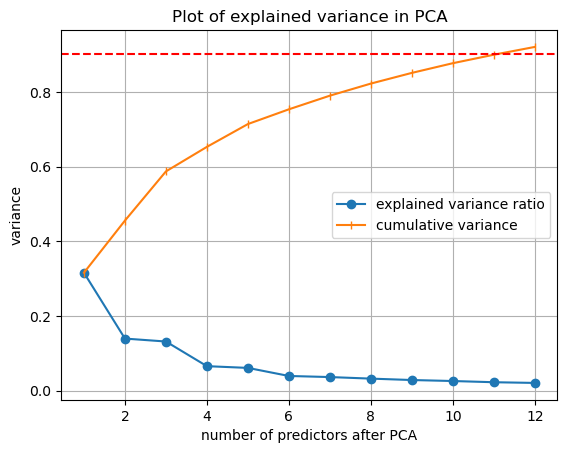

In [26]:
x = np.arange(1, 13)

# Plot
plt.plot(x, explained_variance_ratio, marker='o', label='explained variance ratio')
plt.plot(x, cumulative_variance, marker='|',label='cumulative variance')
plt.legend()
plt.axhline(y=0.9, color='red', linestyle='--')
plt.xlabel('number of predictors after PCA')
plt.ylabel('variance')
plt.title('Plot of explained variance in PCA')
plt.grid(True)
plt.show()

In [14]:
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])], index=dfuse.index)

# Keep excluded columns
meta_cols = dfuse[["unique_id", "timestamp", "y", "location_id"]]

# Concatenate
df_combined = pd.concat([meta_cols, df_pca], axis=1)

In [18]:
len(df_combined.columns)

16

In [63]:
df_combined.to_csv('data/merged_data.csv', index=False)

In [26]:
London=metadata[metadata["location"]=="London, UK"]

In [31]:
set(London["cluster_size"])

{1}

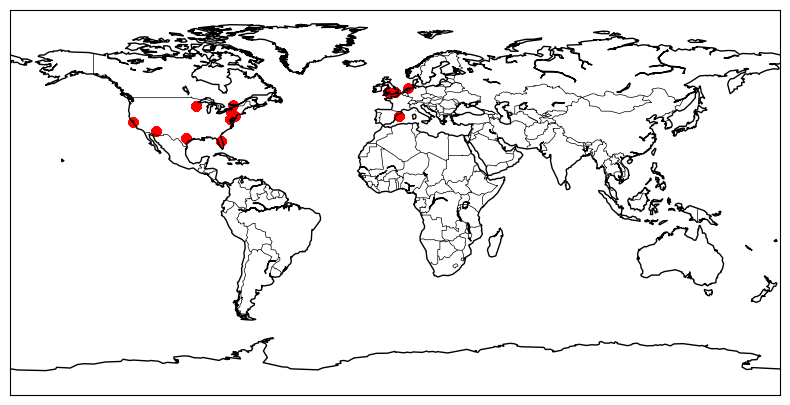

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Create a map
plt.figure(figsize=(10, 5))
m = Basemap(projection='cyl', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()
m.drawcountries()

# Example data points
lats = [37.7749, 34.0522, 40.7128]
lons = [-122.4194, -118.2437, -74.0060]

# Plot data
m.scatter(metadata["longitude"], metadata["latitude"], latlon=True, marker='o', color='red')

plt.show()

In [47]:
metadata.groupby("freq").count()

/var/folders/hw/vdc7gpmx1fq6cdkbj2md0_340000gn/T/ipykernel_45479/409238416.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  metadata.groupby("freq").count()


,unique_id,dataset,building_id,location_id,latitude,longitude,location,timezone,building_class,cluster_size
freq,,,,,,,,,,
15T,370,370,370,370,370,370,370,370,370,370
1H,1636,1636,1636,1399,1399,1399,1399,1636,1636,1636
30T,5566,5566,5566,5566,5566,5566,5566,5566,5566,5566
